## 1) Import rollingsales_manhattan.csv as a DataFrame

In [1]:
import numpy as np 
import pandas as pd

df = pd.read_csv("rollingsales_manhattan.csv", skiprows=4)
df.dropna(how="all", inplace=True)
print(df)

BOROUGH              NEIGHBORHOOD    BUILDING CLASS CATEGORY  \
0          1.0             ALPHABET CITY    01 ONE FAMILY DWELLINGS   
1          1.0             ALPHABET CITY    01 ONE FAMILY DWELLINGS   
2          1.0             ALPHABET CITY    02 TWO FAMILY DWELLINGS   
3          1.0             ALPHABET CITY    02 TWO FAMILY DWELLINGS   
4          1.0             ALPHABET CITY    02 TWO FAMILY DWELLINGS   
...        ...                       ...                        ...   
17154      1.0  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17155      1.0  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17156      1.0  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17157      1.0  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17158      1.0  WASHINGTON HEIGHTS UPPER           44 CONDO PARKING   

      TAX CLASS AT PRESENT   BLOCK     LOT  EASE-MENT  \
0                        1   376.0    43.0        NaN   
1                        1   400.0    19

The first 4 rows of the file only contained markup/description for the file, and the actual data started after the first 4 rows. In order to have read_csv parse the column and row labels correctly, the first 4 rows had to be omitted from the read_csv.

## 2) Display columns and row samples


In [2]:
print(df.columns)

print(df.head(5))

print(df.sample(n=5))

print(df.tail(5))

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       ' SALE PRICE ', 'SALE DATE'],
      dtype='object')
   BOROUGH   NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      1.0  ALPHABET CITY  01 ONE FAMILY DWELLINGS                    1   
1      1.0  ALPHABET CITY  01 ONE FAMILY DWELLINGS                    1   
2      1.0  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   
3      1.0  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   
4      1.0  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   

   BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT              ADDRESS  \
0  376.0  43.0     

## 3) Describe the rows and data types


In [13]:
print(df.info)

print(df.dtypes)

print(df.count())

<bound method DataFrame.info of                    NEIGHBORHOOD    BUILDING CLASS CATEGORY  \
0                 ALPHABET CITY    01 ONE FAMILY DWELLINGS   
1                 ALPHABET CITY    01 ONE FAMILY DWELLINGS   
2                 ALPHABET CITY    02 TWO FAMILY DWELLINGS   
3                 ALPHABET CITY    02 TWO FAMILY DWELLINGS   
4                 ALPHABET CITY    02 TWO FAMILY DWELLINGS   
...                         ...                        ...   
17154  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17155  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17156  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17157  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17158  WASHINGTON HEIGHTS UPPER           44 CONDO PARKING   

      TAX CLASS AT PRESENT   BLOCK     LOT BUILDING CLASS AT PRESENT  \
0                        1   376.0    43.0                        S1   
1                        1   400.0    19.0                        A4   
2      

Columns with "wrong" type:

    - NEIGHBORHOOD: str
    - BUILDING CLASS CATEGORY: str
    - TAX CLASS AT PRESENT: str
    - BUILDING CLASS AT PRESENT: str
    - ADDRESS: str
    - APARTMENT NUMBER: str
    - LAND SQUARE FEET: float64
    - GROSS SQUARE FEET: float64
    - BUILDING CLASS AT TIME OF SALE: str
    - SALE PRICE: float64

In [4]:
# pd.options.display.float_format = '{:,.0f}'.format

# df[['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'BUILDING CLASS AT TIME OF SALE']] = df[['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'BUILDING CLASS AT TIME OF SALE']].applymap(str)

df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].str.replace(',', '').apply(float)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].str.replace(',', '').apply(float)
df[' SALE PRICE '] = df[' SALE PRICE '].str.replace(',', '').apply(float)
df['YEAR BUILT'] = df['YEAR BUILT'].astype(str).str.replace(',', '').apply(float)



print(df)
print(df.dtypes)

BOROUGH              NEIGHBORHOOD    BUILDING CLASS CATEGORY  \
0          1.0             ALPHABET CITY    01 ONE FAMILY DWELLINGS   
1          1.0             ALPHABET CITY    01 ONE FAMILY DWELLINGS   
2          1.0             ALPHABET CITY    02 TWO FAMILY DWELLINGS   
3          1.0             ALPHABET CITY    02 TWO FAMILY DWELLINGS   
4          1.0             ALPHABET CITY    02 TWO FAMILY DWELLINGS   
...        ...                       ...                        ...   
17154      1.0  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17155      1.0  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17156      1.0  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17157      1.0  WASHINGTON HEIGHTS UPPER  31 COMMERCIAL VACANT LAND   
17158      1.0  WASHINGTON HEIGHTS UPPER           44 CONDO PARKING   

      TAX CLASS AT PRESENT   BLOCK     LOT  EASE-MENT  \
0                        1   376.0    43.0        NaN   
1                        1   400.0    19

## 4) Initial column (or row) clean-up


In [5]:
print(df.iloc[[9, 127], [8, 9]])

df.drop(columns=['BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'], inplace=True)

df.rename(columns={' SALE PRICE ': 'SALE PRICE'}, inplace=True)

print(df.columns)


ADDRESS APARTMENT NUMBER
9    275 EAST 7TH STREET, GD              NaN
127    259 EAST 7 STREET, 1B               1B
Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


These columns should be removed because they are redundant: EASE-MENT only contained NA values as shown through the count() method, BOROUGH is 1 for all entries as the dataset is only for Manhattan, and APARTMENT NUMBER is already included in all of the ADDRESS fields if present, and some APARTMENT NUMBER fields are empty even though their respective ADDRESS field contained an apartment number. For example, row 9 lists the apartment number in the ADDRESS field, but the APARTMENT NUMBER field is empty, and row 127 contains the apartment number in both fields.

This column should be renamed because the extra spaces in the name make it inconsistent with the rest of the column names.

## 5) Determine the top three neighborhoods that had the most properties sold


In [6]:
df['NEIGHBORHOOD'].value_counts()

UPPER EAST SIDE (59-79)      1696
UPPER EAST SIDE (79-96)      1629
UPPER WEST SIDE (59-79)      1499
MIDTOWN EAST                 1006
UPPER WEST SIDE (79-96)       882
MIDTOWN WEST                  800
HARLEM-CENTRAL                760
GRAMERCY                      700
CHELSEA                       637
GREENWICH VILLAGE-CENTRAL     609
LOWER EAST SIDE               598
GREENWICH VILLAGE-WEST        557
MURRAY HILL                   551
TRIBECA                       512
SOHO                          407
UPPER WEST SIDE (96-116)      376
FLATIRON                      319
FINANCIAL                     314
KIPS BAY                      293
MIDTOWN CBD                   242
CLINTON                       242
MANHATTAN VALLEY              230
WASHINGTON HEIGHTS UPPER      228
HARLEM-EAST                   225
FASHION                       198
CIVIC CENTER                  179
WASHINGTON HEIGHTS LOWER      178
JAVITS CENTER                 166
CHINATOWN                     164
EAST VILLAGE  

Top 3 neighborhoods with number of sales: 

1) UPPER EAST SIDE (59-79)      1696
2) UPPER EAST SIDE (79-96)      1629
3) UPPER WEST SIDE (59-79)      1499

As each row documents a single property sale, the frequency of each neighborhood listed in the NEIGHBORHOOD column is the number of sales in that neighborhood, so a simple value_counts() call on the NEIGHBORHOOD column displays the number of sales in each neighborhood.

## 6) Describe the kind of buildings that were sold


In [7]:
# df['BUILDING CLASS CATEGORY'].value_counts()
# df['BUILDING CLASS AT TIME OF SALE'].value_counts()
# df['BUILDING CLASS AT TIME OF SALE'].unique()
import matplotlib.pyplot as plt

building_types = pd.Series([0, 0, 0, 0], index=['One family homes', 'Office buildings', 'Condominiums', "Other"])
# print(building_types)

def parse_building_type(code):
    if code[0] == 'A':
        building_types['One family homes'] += 1
    elif code[0] == 'O':
        building_types['Office buildings'] += 1
    elif code[0] == 'R':
        building_types['Condominiums'] += 1
    else:
        building_types['Other'] += 1

df['BUILDING CLASS AT TIME OF SALE'].apply(parse_building_type)
print(building_types)
building_types.plot(kind='bar')

One family homes     131
Office buildings     146
Condominiums        9120
Other               7762
dtype: int64



Steps:
- Read the documentation, which states that building class codes that start with 'A' are one family homes, 'O' are office buildings, and 'R' are condominiums.

- Created a Series called building_types to store the count of each building type.

- Created a function parse_building_type to be called on each element in BUILDING CLASS AT TIME OF SALE, which reads the first letter of the building class code and adds to the count of the respective building type in building_types.

- Displayed the count by printing and plotting building_types.

## 7) Calculate summary statistics for the prices of properties sold for all of Manhattan and for a couple of select neighborhoods


In [8]:
print(df['SALE PRICE'].describe())
print('\nChinatown:\n')
print(df.loc[df['NEIGHBORHOOD'] == 'CHINATOWN']['SALE PRICE'].describe())
print('\nEast Village:\n')
print(df.loc[df['NEIGHBORHOOD'] == 'EAST VILLAGE']['SALE PRICE'].describe())

count    1.715900e+04
mean     3.430215e+06
std      2.607401e+07
min      0.000000e+00
25%      3.000000e+05
50%      8.750000e+05
75%      2.100000e+06
max      2.155000e+09
Name: SALE PRICE, dtype: float64

Chinatown:

count    1.640000e+02
mean     2.467500e+06
std      4.756622e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+05
75%      2.218750e+06
max      3.000000e+07
Name: SALE PRICE, dtype: float64

East Village:

count    1.630000e+02
mean     2.919427e+06
std      7.319655e+06
min      0.000000e+00
25%      1.180250e+05
50%      8.700000e+05
75%      1.790000e+06
max      7.315000e+07
Name: SALE PRICE, dtype: float64


Summary analysis:
- Mean: East Village has a higher average sale price, with a mean of $2,919,427
- Median: East Village has a higher median sale price, with a median of $870,000
- 25%: East Village has a higher 25 percentile, $118,250
- 75%: Chinatown has a higher 75 percentile, $2,218,750
- Max: East Village has the higher max sale price, $73,150,000
- Min: Both Chinatown and East Village have a minimum sale price of $0

Steps:

- Called describe on SALE PRICE to get the summary statistics on sale price for the whole dataset.
- Called loc to find all entries for Chinatown and East Village, indexed for the sale price for those entries, and called describe on the result to retrieve summary statistics for the sale prices of the individual neighborhoods.



## 8) Bin the prices of properties sold


$0      3666
25%      640
50%     4303
75%     4269
100%    4281
Name: SALE PRICE, dtype: int64


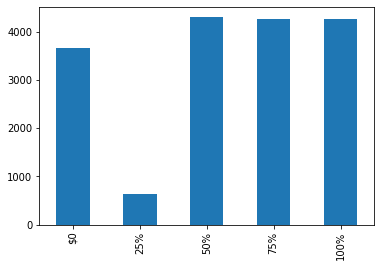

In [9]:
prices = df['SALE PRICE']
bins = [-1, 0, 300000, 875000, 2100000, 2155000000]
labels = ['$0', '25%', '50%', '75%', '100%']

prices = pd.cut(prices, bins, labels=labels)
price_data = pd.value_counts(prices).sort_index(ascending=True)
print(price_data)

price_data.plot(kind='bar')

- This dataset is unusual because the vast majority of the 25th percentile price is $0.
- This might affect the earlier calculations by lowering the mean, median and skewing the percentile ranges lower than they should be when not taking into consideration transfers of ownership without cash considerations ($0 sales).
- To "fix" this, or to get the summary statistics without considering transfers of ownership without cash considerations, simply exclude the $0 sales and get the summary statistics from the new dataset.


## 9) Create a visualization the shows the relationship (if any) between the price sold and the number of square footage of all the areas of a property within a building or a structure


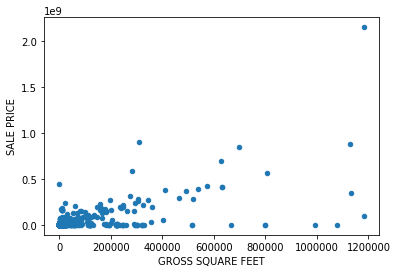

In [10]:
non_zero_prices = df.loc[df['SALE PRICE'].ne(0)].sort_values(by=['SALE PRICE'])

# q_low = non_zero_prices['SALE PRICE'].quantile(0.002)
# q_hi  = non_zero_prices['SALE PRICE'].quantile(0.998)

# non_zero_prices_filtered = non_zero_prices[(non_zero_prices['SALE PRICE'] < q_hi) & (non_zero_prices['SALE PRICE'] > q_low)]

# print(non_zero_prices)

non_zero_prices.plot(kind='scatter', x='GROSS SQUARE FEET', y='SALE PRICE')

Steps:

- To clean the data from $0 sales, filtered out all sales with 0 SALE PRICE as non_zero_prices using loc and ne.
- To visualize the relationship between internal square footage and sale price, called plot on non_zero_prices to make a scatterplot showing SALE PRICE over GROSS SQUARE FEET.

## 10) Which month did the least amount of sales occur

Jun    2059
May    1667
Dec    1546
Oct    1539
Apr    1463
Jan    1438
Sep    1359
Jul    1343
Mar    1327
Nov    1260
Feb    1215
Aug     943
Name: SALE MONTH, dtype: int64


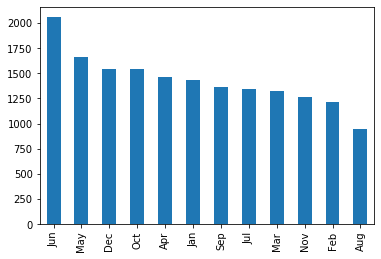

In [12]:
import calendar as cal

month_nums = pd.DatetimeIndex(df['SALE DATE']).month
df['SALE MONTH'] = 'month'

for i in range(len(month_nums)):
    df['SALE MONTH'][i] = cal.month_abbr[month_nums[i]]

# print(month_nums.value_counts())
# print(df['SALE MONTH'])

print(df['SALE MONTH'].value_counts())
df['SALE MONTH'].value_counts().plot(kind='bar')

Steps:

- To isolate the months of each date in number form, used DatetimeIndex and retrieved the month from each entry in SALE DATE into month_nums.
- Created a new column to hold the month names and filled the column with a for loop, converting the month numbers to their respective names (there's probably a quicker way to do this but couldn't figure it out).
- Called value_counts() on the new SALE MONTH column to find the number of sales for each month.

The month with the least sales was August, with 943 sales. Property sales seem to reach a lull after June, which is actually the month with the highest number of sales, and drops off sharply thru July to August.